In [1]:
#grab dependencies
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from functools import partial,reduce
import seaborn as sns
from datetime import datetime
import plotly.plotly as py
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [63]:
#import file
lending_club = pd.read_csv('lendingclub_final_attached_labels.csv')

In [151]:
numeric_columns =  ['pct_tl_nvr_dlq',
 'avg_cur_bal',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'bc_util',
 'percent_bc_gt_75',
 'bc_open_to_buy',
 'acc_open_past_24mths',
 'total_bal_ex_mort',
 'total_bc_limit',
 'revol_util',
 'dti',
 'zip_code',
 'inq_last_6mths',
 'total_rec_late_fee',
 'Unnamed: 0.1',
 'last_pymnt_amnt',
 'application_type',
 'total_pymnt_inv',
 'total_rec_int',
 'revol_bal',
 'total_pymnt',
 'home_ownership',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'annual_inc',
 'initial_list_status',
 'issue_d',
 'loan_status',
 'addr_state',
 'open_acc',
 'pub_rec',
 'total_acc']

In [69]:
cluster_columns = ['Label_for 6 clusters', 'Label_for 7 clusters', 'Label_for 8 clusters', 'Label_for 9 clusters', 
                   'outlier label at0.02', 'outlier label at0.027999999999999997', 'outlier label at0.036', 
                   'outlier label at0.044', 'outlier label at0.05199999999999999',
                   'outlier label at0.06']
#function that converts float to object
def change_to_int(x):
    if x.isnull() == True:
        pass
    else:
        x = int(x)
        return(x)
#for column in cluster_columns:
#    lending_club[column] = lending_club[column].apply(change_to_int) 
    

In [70]:
#there are three columns of type class object, lets examine
object_columns = ['revol_util','int_rate']
#create function that removes percent sign and converts 
def change_percent(x):
    #x must be a string,remove percent
    if type(x) == str: 
        x = x.strip('%')
        #convert to float
        x = float(x)
        #covernt to percntage points
        x = x*.01
        #return x
        return(x)
    else:
        pass
#apply function to columns with percents
for column in object_columns:
    lending_club[column] = lending_club[column].apply(change_percent)

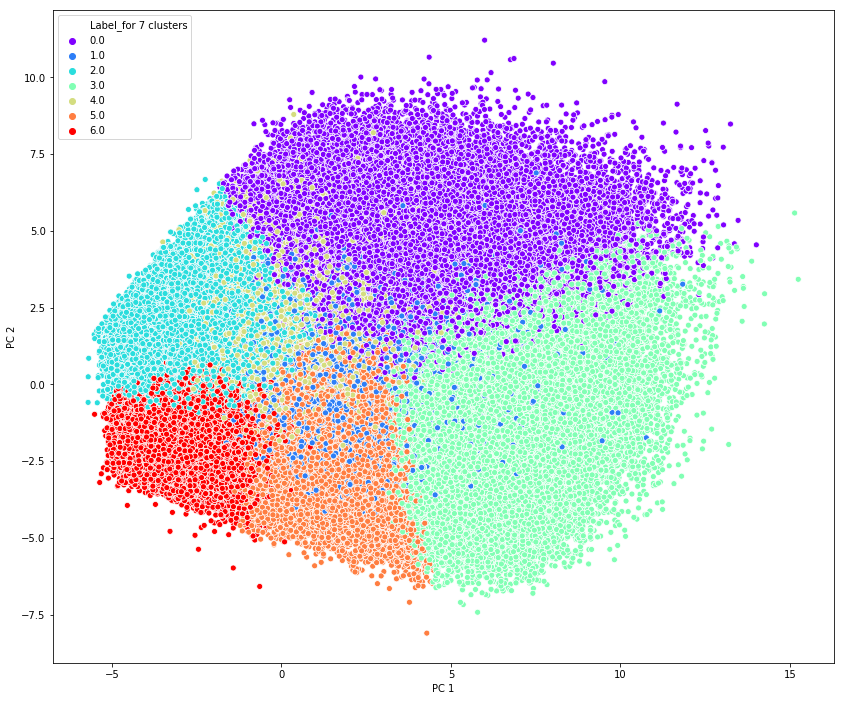

In [137]:
plt.figure(figsize=(14, 12))
sns.scatterplot(x="PC 1", y="PC 2", data=lending_club,hue='Label_for 7 clusters',legend='full',palette='rainbow')
#clusters look defined to me

In [81]:
lending_club['year'].value_counts()
#bin years into 2012-2014 and 2015-2017
#write function that does so
def bin_years(x):
    if x in [2012,2013,2014]:
        #conver to string
        x = str(x)
        #replace with label
        x = '2012 to 2014'
        return(x)
    if x in [2015,2016,2017]:
        #conver to string
        x = str(x)
        #replace with label
        x = '2015 to 2017'
        return(x)
    else:
        pass 
lending_club['year_grouping'] = lending_club['year'].apply(bin_years)

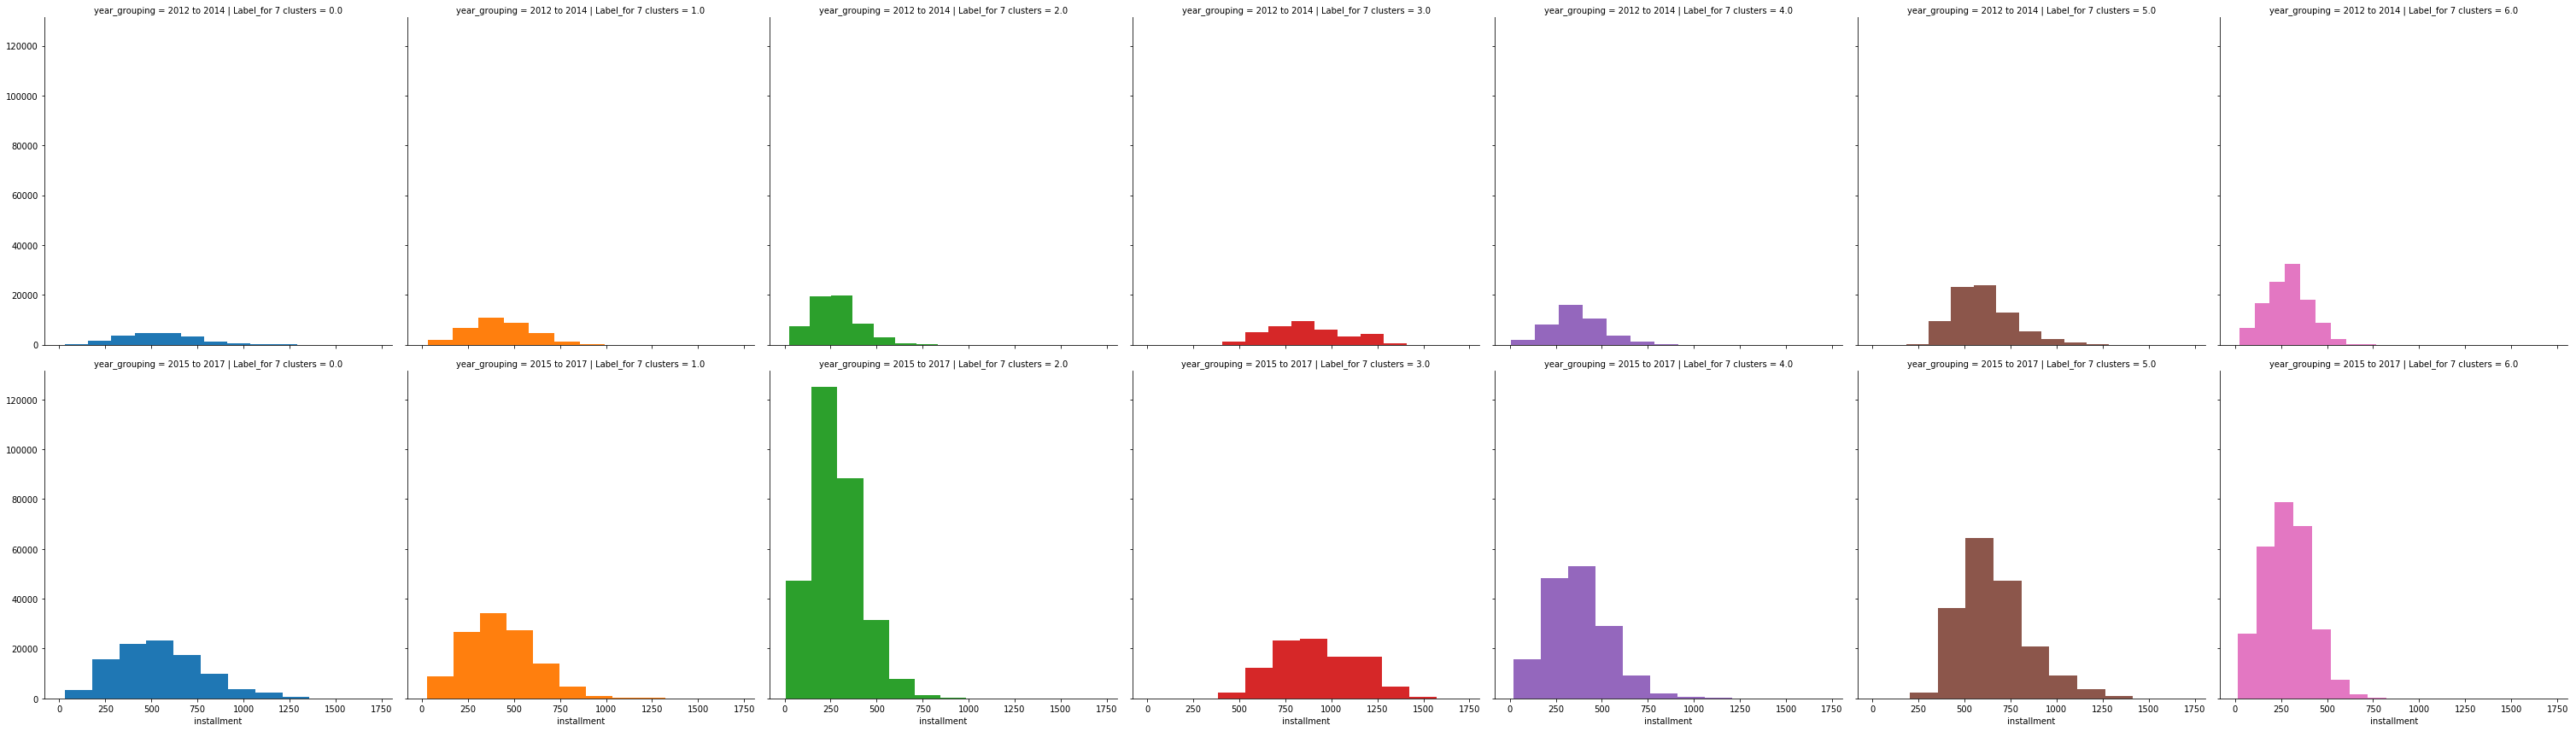

In [140]:
g = sns.FacetGrid(lending_club, col="Label_for 7 clusters", row="year_grouping",
                  height=6, aspect=1,hue="Label_for 7 clusters")
g.map(plt.hist,'installment')


In [118]:
#get summary statistics for each cluster
lending_club.groupby(['grade']).describe().T

grade                                                  A             B             C             D             E             F             G
Label_for 6 clusters                 count  2.626310e+05  4.773890e+05  4.883940e+05  2.356290e+05  1.063570e+05  3.440500e+04  9.936000e+03
                                     mean   2.596582e+00  2.469248e+00  2.498061e+00  2.628102e+00  2.963209e+00  3.186339e+00  3.349235e+00
                                     std    1.590853e+00  1.838278e+00  1.948428e+00  2.024959e+00  2.000792e+00  1.971430e+00  1.901927e+00
                                     min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                                     25%    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  2.000000e+00
                                     50%    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00  4.000000e+00
                                     75%    4.000000e+00  4.000000e+00  4.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00
                                     max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00
Label_for 7 clusters                 count  2.626310e+05  4.773890e+05  4.883940e+05  2.356290e+05  1.063570e+05  3.440500e+04  9.936000e+03
                                     mean   2.213440e+00  3.361443e+00  3.861151e+00  4.165913e+00  4.245861e+00  4.316495e+00  4.267713e+00
                                     std    1.863725e+00  2.015815e+00  1.878124e+00  1.695033e+00  1.533981e+00  1.412966e+00  1.383776e+00
                                     min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                                     25%    1.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00
                                     50%    2.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00
                                     75%    3.000000e+00  5.000000e+00  6.000000e+00  6.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00
                                     max    6.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00
Label_for 8 clusters                 count  2.626310e+05  4.773890e+05  4.883940e+05  2.356290e+05  1.063570e+05  3.440500e+04  9.936000e+03
                                     mean   3.648583e+00  3.565095e+00  3.629414e+00  3.652606e+00  3.563771e+00  3.511786e+00  3.420793e+00
                                     std    2.631476e+00  2.273367e+00  2.066148e+00  1.887819e+00  1.701780e+00  1.576024e+00  1.512693e+00
                                     min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                                     25%    1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00
                                     50%    4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  3.000000e+00  3.000000e+00
                                     75%    6.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00  5.000000e+00  4.000000e+00  4.000000e+00
                                     max    7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00
Label_for 9 clusters                 count  2.626310e+05  4.773890e+05  4.883940e+05  2.356290e+05  1.063570e+05  3.440500e+04  9.936000e+03
                                     mean   3.048288e+00  3.219701e+00  3.458734e+00  3.587182e+00  3.556964e+00  3.563872e+00  3.608796e+00
                                     std    2.379175e+00  2.289183e+00  2.179076e+00  2.045457e+00  1.959815e+00  1.907850e+00  1.936391e+00
                                     min    0.000000

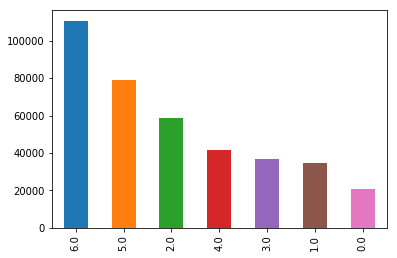

In [146]:
#get index for first year grouping 
index1 = lending_club['year_grouping'] == '2012 to 2014'
lending_club[index1]['Label_for 7 clusters'].value_counts().plot.bar()

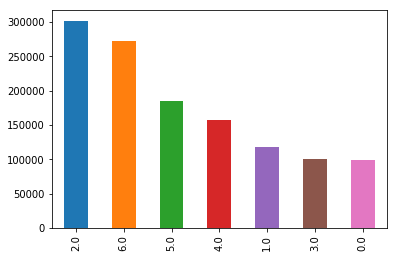

In [149]:
#index for second grouping
index2 = lending_club['year_grouping'] == '2015 to 2017'
lending_club[index2]['Label_for 7 clusters'].value_counts().plot.bar()

In [154]:
numeric_columns =  ['pct_tl_nvr_dlq',
 'avg_cur_bal',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'bc_util',
 'percent_bc_gt_75',
 'bc_open_to_buy',
 'acc_open_past_24mths',
 'total_bal_ex_mort',
 'total_bc_limit',
 'revol_util',
 'dti',
 'zip_code',
 'inq_last_6mths',
 'total_rec_late_fee',
 'last_pymnt_amnt',
 'application_type',
 'total_pymnt_inv',
 'total_rec_int',
 'revol_bal',
 'total_pymnt',
 'home_ownership',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'annual_inc',
 'initial_list_status',
 'issue_d',
 'loan_status',
 'addr_state',
 'open_acc',
 'pub_rec',
 'total_acc',
   'Label_for 7 clusters'                ]
lending_club[numeric_columns].groupby(['Label_for 7 clusters']).describe().columns

MultiIndex(levels=[['Label_for 6 clusters', 'Label_for 8 clusters', 'Label_for 9 clusters', 'PC 1', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'Unnamed: 0', 'Unnamed: 0.1', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti', 'funded_amnt', 'index_labels', 'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt', 'open_acc', 'outlier label at0.02', 'outlier label at0.027999999999999997', 'outlier label at0.036', 'outlier label at0.044', 'outlier label at0.05199999999999999', 'outlier label at0.06', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'revol_bal', 'revol_util', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bc_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rev_hi_lim', 'year'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0,